**Introduction**

This project implements a Sparse Autoencoder on the Fashion MNIST dataset to learn compact and meaningful representations of clothing images in an unsupervised way. The model compresses each image into a 32-dimensional latent space and reconstructs it back, demonstrating its ability to capture essential visual patterns. By applying L1 regularization, the autoencoder enforces sparsity in the hidden layer, allowing it to activate only a few neurons for each input. This leads to more efficient, interpretable, and robust feature learning, making sparse autoencoders valuable for tasks such as feature extraction, anomaly detection, and dimensionality reduction.

**Importing Libaries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

**Loading and Processing the data**

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)


**Define the model parameters**

In [4]:
n = 10
encoding_dim = 32

**Build the Autoencoder Model**

In [5]:
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu',
                                activity_regularizer=tf.keras.regularizers.l1(1e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

sparse_autoencoder = tf.keras.Model(input_img, decoded)

**Compile the model**

In [6]:
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Train the Autoencoder**

In [7]:
sparse_autoencoder.fit(x_train_flat, x_train_flat,
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test_flat, x_test_flat))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6382 - val_loss: 0.4686
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.4565 - val_loss: 0.4133
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4026 - val_loss: 0.3866
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3821 - val_loss: 0.3744
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3701 - val_loss: 0.3661
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3628 - val_loss: 0.3603
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3582 - val_loss: 0.3567
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3547 - val_loss: 0.3542
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3515 - val_loss: 0.3523
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3499 - val_loss: 0.3506
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3486 - val_loss: 0.3495
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms

**Reconstructed Images**

In [8]:
decoded_imgs = sparse_autoencoder.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Visualize Original vs. Reconstructed Images**

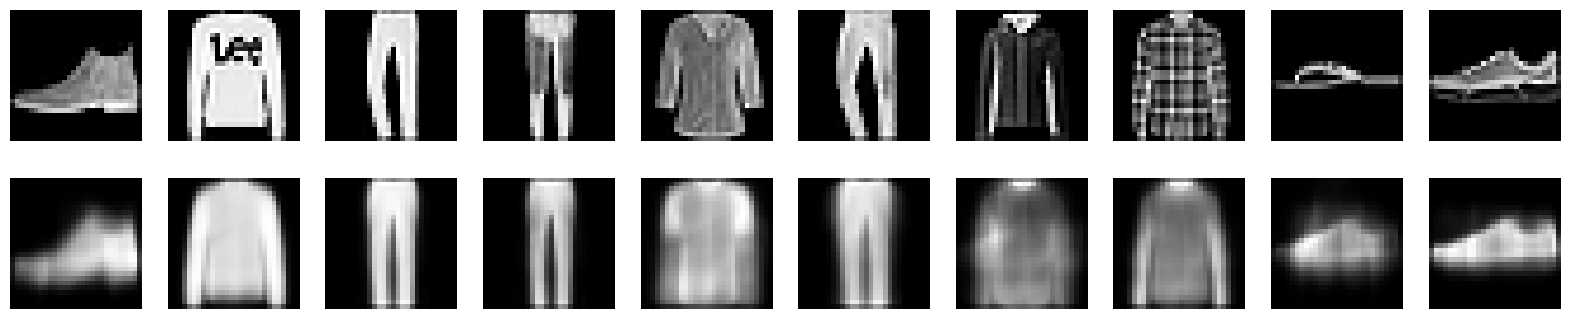

In [9]:
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

**Conclusion**

In this project, we successfully implemented a Sparse Autoencoder using the Fashion MNIST dataset to learn efficient and compressed representations of image data in an unsupervised manner. The autoencoder was trained to reconstruct input images from a lower-dimensional latent space of only 32 neurons, achieving meaningful feature extraction while maintaining reconstruction quality.

The introduction of L1 activity regularization encouraged sparsity in the hidden layer, leading to a more compact and interpretable encoding. Despite the dimensionality reduction, the decoder effectively reconstructed recognizable images, demonstrating the model’s ability to capture essential visual features such as shape and texture.

This experiment highlights the power of autoencoders for unsupervised representation learning, where models can learn useful features without labeled data. Sparse autoencoders, in particular, help in discovering more discriminative and efficient representations, which can later be utilized for tasks like anomaly detection, clustering, or pretraining in deeper neural networks.

Future improvements can include exploring deep or convolutional autoencoders for richer spatial feature extraction, tuning the regularization strength for better sparsity control, and extending this work to more complex datasets for enhanced generalization.